In [1]:
import dac
from audiotools import AudioSignal
from audiotools.data.datasets import AudioDataset, AudioLoader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

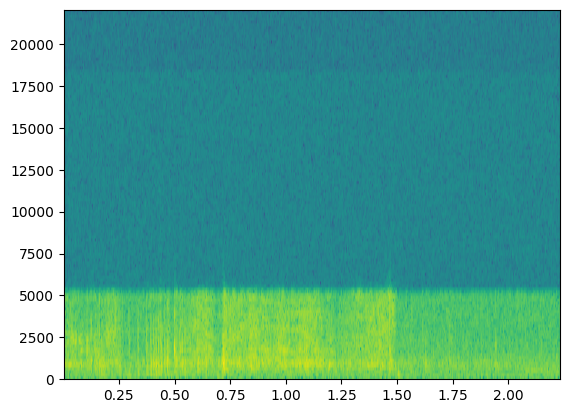

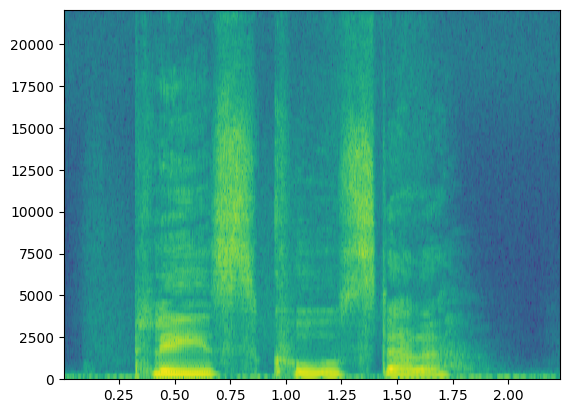

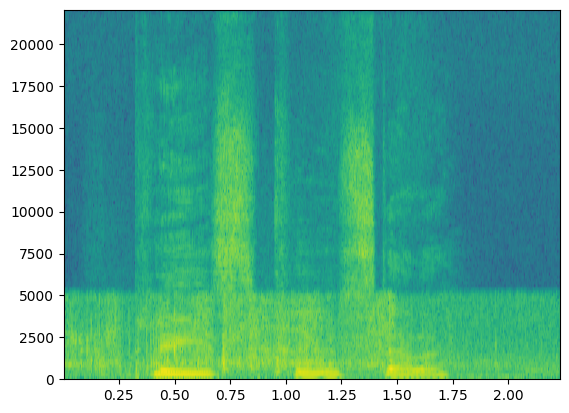

In [12]:
signal = AudioSignal("../data/voice_fullband/p225/p225_001_mic1.wav")
noise = AudioSignal("../data/noise_fullband/_--yppZU_w4.wav")
signal_noise = signal.clone()
signal_noise.mix(noise, snr=5).audio_data.squeeze(1).numpy()


plt.specgram(noise.audio_data.squeeze().numpy(), Fs=44100)
plt.show()
plt.specgram(signal.audio_data.squeeze().numpy(), Fs=44100)
plt.show()
plt.specgram(signal_noise.audio_data.squeeze().numpy(), Fs=44100)
plt.show()

In [13]:
from IPython.display import Audio
Audio(signal_noise.audio_data.squeeze().numpy(), rate=44100)

In [5]:
voicedataloader = AudioLoader(sources=["../data/voice_fullband"], shuffle=False)
noisedataloader = AudioLoader(sources=["../data/noise_fullband"], shuffle=True)

In [14]:
voiceds = AudioDataset(voicedataloader, sample_rate=44100)
noiseds = AudioDataset(noisedataloader, sample_rate=44100)

In [15]:
voiceds[0]

{'idx': 0,
 'signal': <audiotools.core.audio_signal.AudioSignal at 0x1e2105a2a50>,
 'source_idx': 0,
 'item_idx': 0,
 'source': '../data/voice_fullband',
 'path': '..\\data\\voice_fullband\\p225\\p225_001_mic1.wav'}

In [132]:
voiceds.collate

<function audiotools.data.datasets.AudioDataset.collate(list_of_dicts: Union[list, dict], n_splits: int = None)>

In [5]:
model_path = dac.utils.download(model_type="44khz")

generator = dac.DAC.load(model_path).cuda()

In [156]:
next(iter(DataLoader(voiceds, batch_size=4, shuffle=True, collate_fn=voiceds.collate)))["signal"].audio_data

tensor([[[ 0.0094,  0.0072,  0.0065,  ...,  0.1513,  0.1557,  0.1493]],

        [[-0.0039, -0.0045, -0.0055,  ..., -0.0077, -0.0077, -0.0076]],

        [[ 0.0049,  0.0051,  0.0050,  ..., -0.0115, -0.0147, -0.0112]],

        [[-0.0081, -0.0076, -0.0079,  ..., -0.0217, -0.0253, -0.0283]]])

In [11]:
def make_noisy(clean, noise, snr=1):
    clean2 = clean
    return clean["signal"].clone().mix(noise["signal"], snr=10)

In [20]:
clean, noise = voiceds[0], noiseds[1]
noisy = make_noisy(clean, noise)
clean = clean["signal"]

In [168]:
generator(noisy.audio_data.cuda(), noisy.sample_rate)

{'audio': tensor([[[0.0142, 0.0234, 0.0143,  ..., 0.3772, 0.3121, 0.2618]]],
        device='cuda:0', grad_fn=<SliceBackward0>),
 'z': tensor([[[-0.3520, -2.0859,  0.7211,  ..., -0.0742,  1.2002, -0.0406],
          [ 7.5654,  8.6975,  1.9892,  ...,  3.7651,  2.5579, -4.2849],
          [ 8.6884, -1.6781, -3.2634,  ...,  4.7621, -3.0436, -5.9107],
          ...,
          [-0.1582, -4.3348, -7.0947,  ...,  4.5835,  6.5432,  0.1560],
          [-0.5438,  3.0731,  0.8026,  ..., -1.4994,  2.4224, -3.5125],
          [ 0.9346, -1.9832, -5.7955,  ...,  2.1003, -2.1814,  3.2701]]],
        device='cuda:0', grad_fn=<AddBackward0>),
 'codes': tensor([[[ 176,  506,  480,  419,  795,  983,  805,  632,  546,  733,  463,
            211,   11,  623,  199,  844,  319,   62,  502,  145,  918,  602,
            866,  685,  631,  893,  381,  467,  419,  250,  614,  288,  732,
            692,  668,  178,  351,  798,  375,  983,  549,  896, 1015,  999],
          [ 788,  330,  829,  121,   42,  679,  3

In [7]:
from dac.nn.loss import L1Loss, MelSpectrogramLoss, SISDRLoss, MultiScaleSTFTLoss, GANLoss

In [24]:
discriminator = dac.model.Discriminator()
a,b = GANLoss(discriminator).generator_loss(noisy, clean)

In [25]:
a,b

(tensor(7.8459, grad_fn=<AddBackward0>),
 tensor(2.6590, grad_fn=<AddBackward0>))

In [120]:
d_fake, d_real = discriminator_loss.forward(fake=signal, real=signal_copy)

In [ ]:
discriminator_loss.generator_loss

In [129]:
signal

In [128]:
d_fake

[[tensor([[[[-0.0144, -0.0144],
            [-0.0144, -0.0144],
            [-0.0144, -0.0144],
            ...,
            [-0.0143, -0.0143],
            [-0.0143, -0.0143],
            [-0.0147, -0.0148]],
  
           [[-0.0263, -0.0264],
            [-0.0261, -0.0261],
            [-0.0261, -0.0261],
            ...,
            [-0.0262, -0.0262],
            [-0.0262, -0.0262],
            [-0.0257, -0.0258]],
  
           [[ 0.2942,  0.2946],
            [ 0.2915,  0.2917],
            [ 0.2920,  0.2918],
            ...,
            [ 0.2915,  0.2919],
            [ 0.2919,  0.2917],
            [ 0.2889,  0.2888]],
  
           ...,
  
           [[-0.0234, -0.0235],
            [-0.0234, -0.0234],
            [-0.0234, -0.0234],
            ...,
            [-0.0235, -0.0235],
            [-0.0235, -0.0235],
            [-0.0232, -0.0233]],
  
           [[-0.0024, -0.0024],
            [-0.0027, -0.0027],
            [-0.0027, -0.0027],
            ...,
            [-0.

In [84]:
losses.GANLoss

dac.nn.loss.GANLoss

In [85]:
voiceds

In [87]:
from IPython.display import Audio

In [88]:
Audio(voiceds[3]["signal"].audio_data.squeeze(1).numpy(), rate=44100)

In [124]:
import argparse
import json
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader
from torchmetrics.audio import SignalDistortionRatio as SDR
from torch.profiler import profile, record_function, ProfilerActivity
import wandb
from audiotools import AudioSignal
from audiotools.data.datasets import AudioDataset, AudioLoader
import dac
from dac.nn.layers import snake, Snake1d
from dac.nn.loss import *
from flatten_dict import flatten, unflatten

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    torch.backends.cudnn.benchmark = True
    torch.backends.cuda.matmul.allow_tf32 = True


voice_folder = "../data/voice_fullband"
noise_folder = "../data/noise_fullband"

# Dataloaders and datasets
#############################################
audioloader_dict = {
    "voice": AudioLoader(sources=[voice_folder], shuffle=False), 
    "noise": AudioLoader(sources=[noise_folder], shuffle=False)
    }
dataset = AudioDataset(audioloader_dict,n_examples=1000, sample_rate=44100, duration = 5.0)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False, collate_fn=dataset.collate, pin_memory=True)

In [103]:
file_path = audioloader_dict["voice"].audio_lists[0][0]["path"]
audios = AudioSignal(file_path, 44100)
audios.sample_rate

48000

In [127]:
dataset[0]["voice"]["signal"]